In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_parquet(os.path.join("data","jizdenky.parquet"))

In [5]:
df.shape

(232117, 25)

In [7]:
df.groupby('den').size().sort_values(ascending=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_12512\4259943038.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('den').size().sort_values(ascending=True)


den
st    31743
pá    32257
út    32373
čt    32836
so    33178
po    34128
ne    35602
dtype: int64

In [670]:
len(df[df['prodejce'] == 'ARR'])

13322

In [671]:
len(df[df['prodejce'] == 'ARR'].drop_duplicates(subset=['odkud','kam','oscrapovano','odjezd']))

13322

In [672]:
df[(df['prodejce'] == 'ARR') & (df['odjezd'] == '2024-11-22 21:27:00')].head(20000).tail(50)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
148665,2024-11-07 19:13:40,ARR,Ústí nad Labem hlavní nádraží,Liberec,2024-11-22 21:27:00,15 days 02:13:20,15,362.222222,NaN,vlak,NaN,None,NaN,113.0,None,None,pá,NaN,[R 1335],None,None,NaN,NaN,NaN,NaN
169608,2024-11-08 12:53:11,ARR,Ústí nad Labem hlavní nádraží,Liberec,2024-11-22 21:27:00,14 days 08:33:49,14,344.563611,145.0,vlak,39.0,None,NaN,113.0,None,None,pá,NaN,[R 1335],None,None,NaN,NaN,NaN,NaN
241348,2024-11-09 19:27:48,ARR,Ústí nad Labem hlavní nádraží,Liberec,2024-11-22 21:27:00,13 days 01:59:12,13,313.986667,145.0,vlak,39.0,None,NaN,113.0,None,None,pá,NaN,[R 1335],None,None,NaN,NaN,NaN,NaN


In [673]:
df.groupby(['prodejce',pd.Grouper(key='oscrapovano',freq='D')]).size()

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\3731602829.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['prodejce',pd.Grouper(key='oscrapovano',freq='D')]).size()


prodejce  oscrapovano
ARR       2024-10-31         0
          2024-11-01         0
          2024-11-02         0
          2024-11-03         0
          2024-11-04         0
          2024-11-05         0
          2024-11-06         0
          2024-11-07      2429
          2024-11-08      7238
          2024-11-09      3655
LE        2024-10-31         0
          2024-11-01         0
          2024-11-02         0
          2024-11-03         0
          2024-11-04         0
          2024-11-05         0
          2024-11-06         0
          2024-11-07       332
          2024-11-08      1615
          2024-11-09      1873
RJ        2024-10-31         0
          2024-11-01         0
          2024-11-02         0
          2024-11-03         0
          2024-11-04         0
          2024-11-05         0
          2024-11-06      1881
          2024-11-07      1083
          2024-11-08      6292
          2024-11-09      7630
ČD        2024-10-31      1558
          2024-11

In [674]:
df.groupby(['odkud','kam'])['cena'].max().nlargest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\2040972483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['odkud','kam'])['cena'].max().nlargest(10)


odkud                    kam               
Praha hl.n.              Amsterdam Centraal    11644.0
Amsterdam Centraal       Praha hl.n.           11463.0
Amsterdam Bijlmer ArenA  Praha hl.n.           11442.0
Brno hl.n.               Hamburg Hbf            9814.0
Berlin Hbf (tief)        Amsterdam Centraal     8488.0
Bruxelles-Midi           Praha hl.n.            8001.0
Berlin Hbf               Bruxelles-Midi         7412.0
Berlin Hbf (tief)        Praha hl.n.            7412.0
Praha hl.n.              Bruxelles-Midi         7322.0
Berlin Hbf               Hamburg Hbf            7018.0
Name: cena, dtype: float64

In [675]:
df.groupby(['odkud','kam'])['cena'].min().nlargest(20)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\646767245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['odkud','kam'])['cena'].min().nlargest(20)


odkud                    kam               
Berlin Hbf               Hamburg Hbf           7018.0
                         Bruxelles-Central     6814.0
Praha-Smíchov            Bruxelles-Midi        6543.0
Bruxelles-Central        Praha hl.n.           6411.0
Amsterdam Zuid           Praha hl.n.           6311.0
Frankfurt(Main)Hbf       Bruxelles-Midi        6244.0
Amsterdam Centraal       Praha hl.n.           6215.0
Frankfurt Hbf (tief)     Praha hl.n.           6215.0
Frankfurt(Main)Hbf       Amsterdam Centraal    6215.0
Amsterdam Bijlmer ArenA  Praha hl.n.           6195.0
München Hbf              Praha hl.n.           6097.0
Berlin Hbf (tief)        Amsterdam Centraal    5578.0
Leipzig Hbf (tief)       Amsterdam Centraal    5578.0
Praha hl.n.              Amsterdam Zuid        5477.0
Železná Ruda-Alžbětín    Praha-Smíchov         5369.0
Praha hl.n.              Berlin Ostbahnhof     4149.0
Leipzig Hbf (tief)       Berlin Hbf (tief)     3277.0
                         Berlin Südkre

In [676]:
df[df['odkud'].str.contains('Praha',na=False)].groupby('kam')['cena'].max().nlargest(20)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\3724199744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['odkud'].str.contains('Praha',na=False)].groupby('kam')['cena'].max().nlargest(20)


kam
Amsterdam Centraal        11644.0
Bruxelles-Midi             7322.0
Bern                       6894.0
Amsterdam Zuid             6311.0
Berlin Hbf (tief)          5181.0
Warszawa Centralna         4324.0
Berlin Ostbahnhof          4149.0
Ljubljana                  3824.0
Zagreb Glavni kolodvor     3622.0
Berlin Gesundbrunnen       3277.0
Berlin Hbf                 3277.0
Berlin Südkreuz            3277.0
Budapest-Kelenföld         3008.0
Warszawa Wschodnia         2205.0
Bratislava-Petržalka       2085.0
Budapest-Nyugati pu        1922.0
Bratislava hl.st.          1586.0
Wien Hbf                   1550.0
Kraków Główny              1519.0
Krakow Glowny              1396.0
Name: cena, dtype: float64

In [677]:
df['kam'].nunique()

71

In [678]:
df[df['odkud'].str.contains('Praha')].groupby(['kam','prodejce'])['cena'].min().nsmallest(40)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\432856156.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['odkud'].str.contains('Praha')].groupby(['kam','prodejce'])['cena'].min().nsmallest(40)


kam                        prodejce
Brno                       RJ            99.0
Ostrava hl.n.              LE            99.0
Ostrava-Svinov             LE            99.0
Tanvald                    ARR          160.0
České Budějovice           ARR          200.0
Ostrava                    RJ           249.0
Brno hl.n.                 ČD           269.0
Bratislava                 RJ           279.0
Kraków Główny              LE           279.0
Ostrava hl.n.              ČD           289.0
Ostrava-Svinov             ČD           289.0
Vídeň                      RJ           299.0
Plzeň hl.n.                ČD           350.0
Krakow Glowny              ČD           361.0
Berlin Hbf (tief)          ČD           387.0
Berlin Südkreuz            ČD           387.0
Wien Hbf                   ČD           387.0
Budapešť                   RJ           399.0
Košice                     RJ           399.0
Bratislava hl.st.          ČD           400.0
Wien Franz-Josefs-Bahnhof  ČD           439.

<Axes: xlabel='predstih_d', ylabel='cena'>

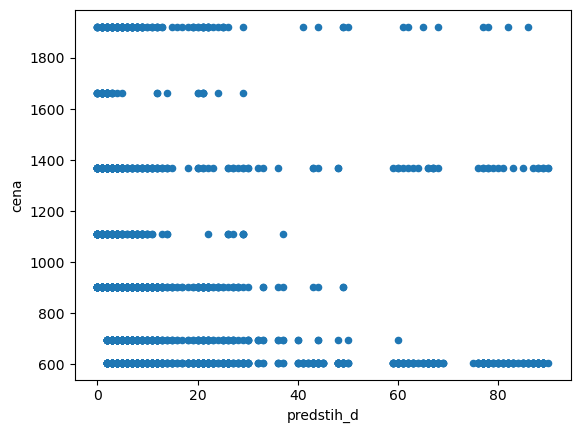

In [740]:
df[df['odkud'].str.contains('Praha') & df['kam'].str.contains('Buda') & (df['prodejce'] == 'ČD') & (df['prestupy'] == 0)].plot.scatter(x='predstih_d',y='cena')

In [11]:
df[df['volnych_mist'].notnull()].groupby('prodejce').size()

C:\Users\micha\AppData\Local\Temp\ipykernel_12512\1571294427.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['volnych_mist'].notnull()].groupby('prodejce').size()


prodejce
ARR    13279
LE      2943
RJ     16880
ČD         0
dtype: int64

<Axes: xlabel='predstih_d', ylabel='volnych_mist'>

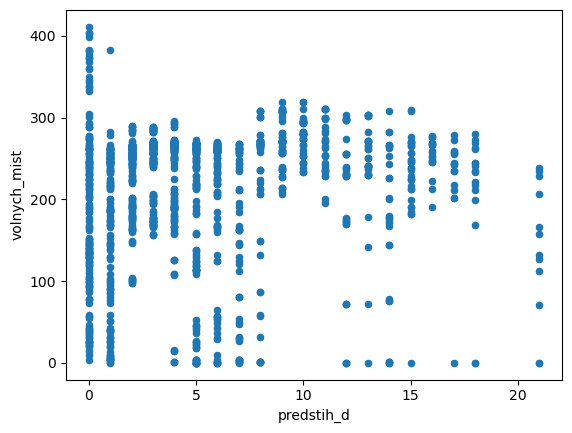

In [9]:
df[df['volnych_mist'].notnull() & (df['kam'] == 'Ostrava')].plot.scatter(x='predstih_d',y='volnych_mist')

In [15]:
df[df['volna_mista_economy'] < 5].sort_values(by='predstih_d',ascending=False).head(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
227378,2024-11-09 14:23:36,LE,Ostrava-Svinov,Praha hl.n.,2024-12-01 16:04:00,22 days 01:40:24,22,529.673333,999.0,None,32.0,None,204.0,351.0,None,None,ne,NaN,[LE1260],None,None,3.0,14.0,12.0,3.0
185418,2024-11-08 21:35:26,LE,Ostrava hl.n.,Praha hl.n.,2024-12-01 15:57:00,22 days 18:21:34,22,546.359444,999.0,None,34.0,None,211.0,356.0,None,None,ne,NaN,[LE1260],None,None,3.0,14.0,12.0,5.0
185419,2024-11-08 21:35:26,LE,Ostrava-Svinov,Praha hl.n.,2024-12-01 16:04:00,22 days 18:28:34,22,546.476111,999.0,None,34.0,None,204.0,351.0,None,None,ne,NaN,[LE1260],None,None,3.0,14.0,12.0,5.0
227368,2024-11-09 14:23:36,LE,Ostrava hl.n.,Praha hl.n.,2024-12-01 15:57:00,22 days 01:33:24,22,529.556667,999.0,None,32.0,None,211.0,356.0,None,None,ne,NaN,[LE1260],None,None,3.0,14.0,12.0,3.0
227344,2024-11-09 14:22:43,LE,Ostrava-Svinov,Praha hl.n.,2024-11-24 16:04:00,15 days 01:41:17,15,361.688056,1099.0,None,34.0,None,204.0,351.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0
227351,2024-11-09 14:22:43,LE,Ostrava hl.n.,Praha hl.n.,2024-11-24 15:57:00,15 days 01:34:17,15,361.571389,1099.0,None,34.0,None,211.0,356.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0
217514,2024-11-09 10:24:33,LE,Ostrava hl.n.,Praha hl.n.,2024-11-24 15:57:00,15 days 05:32:27,15,365.540833,1099.0,None,34.0,None,211.0,356.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0
217513,2024-11-09 10:24:33,LE,Ostrava-Svinov,Praha hl.n.,2024-11-24 16:04:00,15 days 05:39:27,15,365.657500,1099.0,None,34.0,None,204.0,351.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0
231938,2024-11-09 16:17:28,LE,Ostrava hl.n.,Praha hl.n.,2024-11-24 15:57:00,14 days 23:39:32,14,359.658889,1099.0,None,34.0,None,211.0,356.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0
231939,2024-11-09 16:17:28,LE,Ostrava-Svinov,Praha hl.n.,2024-11-24 16:04:00,14 days 23:46:32,14,359.775556,1099.0,None,34.0,None,204.0,351.0,None,None,ne,NaN,[LE1260],None,None,0.0,14.0,17.0,3.0


In [13]:
df[df['volnych_mist'] < 5].sort_values(by='predstih_d',ascending=False).head(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
126034,2024-11-06 21:45:06,RJ,Brno,Praha,2024-12-21 10:09:00,44 days 12:23:54,44,1068.398333,339.0,vlak,2.0,None,150.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN
127582,2024-11-06 21:53:34,RJ,Praha,Košice,2024-12-21 07:47:00,44 days 09:53:26,44,1065.890556,NaN,vlak,0.0,None,505.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN
127583,2024-11-06 21:53:34,RJ,Praha,Košice,2024-12-21 14:47:00,44 days 16:53:26,44,1072.890556,NaN,vlak,0.0,None,505.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN
127567,2024-11-06 21:53:31,RJ,Praha,Košice,2024-12-20 07:47:00,43 days 09:53:29,43,1041.891389,1079.0,vlak,1.0,None,505.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN
127573,2024-11-06 21:53:31,RJ,Praha,Košice,2024-12-20 21:44:00,43 days 23:50:29,43,1055.841389,NaN,vlak,0.0,None,504.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN
127566,2024-11-06 21:53:31,RJ,Praha,Košice,2024-12-20 14:47:00,43 days 16:53:29,43,1048.891389,NaN,vlak,0.0,None,505.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN
125089,2024-11-06 21:42:49,RJ,Praha,Brno,2024-12-20 11:16:00,43 days 13:33:11,43,1045.553056,399.0,vlak,4.0,None,150.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN
125020,2024-11-06 21:42:44,RJ,Praha,Brno,2024-12-18 15:16:00,41 days 17:33:16,41,1001.554444,399.0,vlak,3.0,None,150.0,NaN,None,None,st,0.0,None,None,None,NaN,NaN,NaN,NaN
124980,2024-11-06 21:42:39,RJ,Praha,Brno,2024-12-16 15:16:00,39 days 17:33:21,39,953.555833,NaN,vlak,0.0,None,150.0,NaN,None,None,po,0.0,None,None,None,NaN,NaN,NaN,NaN
125899,2024-11-06 21:44:48,RJ,Brno,Praha,2024-12-15 18:09:00,38 days 20:24:12,38,932.403333,NaN,vlak,0.0,None,150.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN


<Axes: xlabel='odjezd'>

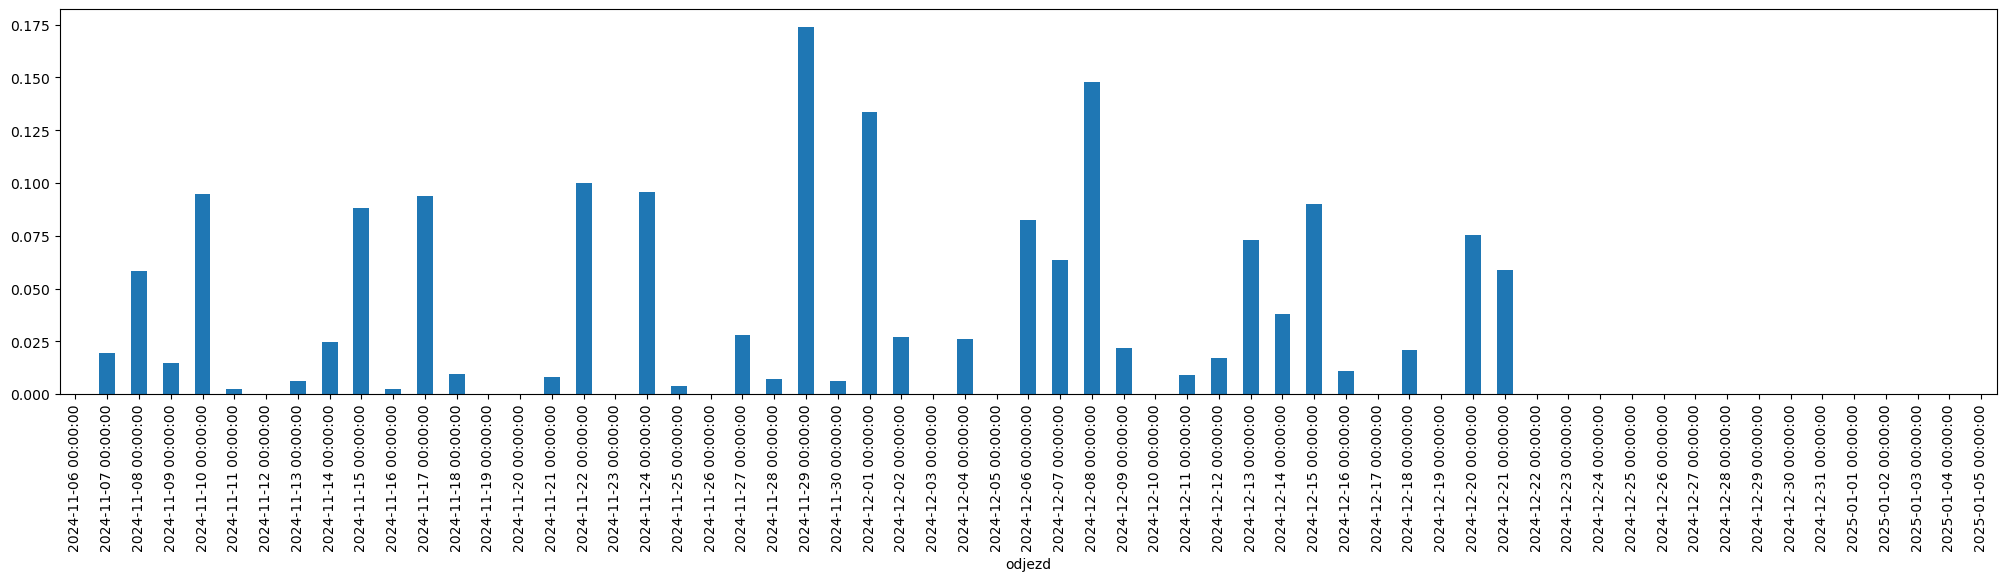

In [782]:
(df[df['volnych_mist'] < 5].groupby(pd.Grouper(key='odjezd',freq='d')).size() / df[df['volnych_mist'].notnull()].groupby(pd.Grouper(key='odjezd',freq='d')).size()).plot.bar(figsize=(25,5))

In [752]:
df[(df['prodejce'].isin(['LE','RJ'])) & (df['odkud'].str.contains('Praha')) & (df['kam'].str.contains('Ostrava')) & (df['volnych_mist'].notnull())].sample(10)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_i
225557,2024-11-09 14:07:49,RJ,Praha,Ostrava,2024-11-12 09:50:00,2 days 19:42:11,2,67.703056,249.0,vlak,248.0,None,191.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,68.0
235083,2024-11-09 18:09:45,RJ,Praha,Ostrava,2024-11-19 16:50:00,9 days 22:40:15,9,238.670833,369.0,vlak,276.0,None,191.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,239.0
244101,2024-11-09 22:06:52,RJ,Praha,Ostrava,2024-11-23 09:50:00,13 days 11:43:08,13,323.718889,439.0,vlak,241.0,None,191.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN,324.0
235059,2024-11-09 18:09:37,RJ,Praha,Ostrava,2024-11-17 13:50:00,7 days 19:40:23,7,187.673056,579.0,vlak,30.0,None,191.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,188.0
239113,2024-11-09 19:06:48,RJ,Praha,Ostrava,2024-11-22 13:50:00,12 days 18:43:12,12,306.720000,579.0,vlak,170.0,None,191.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN,307.0
244175,2024-11-09 22:07:33,RJ,Praha,Ostrava,2024-12-01 09:50:00,21 days 11:42:27,21,515.707500,439.0,vlak,166.0,None,191.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,516.0
202754,2024-11-09 00:08:00,RJ,Praha,Ostrava,2024-11-09 19:50:00,0 days 19:42:00,0,19.700000,369.0,vlak,188.0,None,191.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN,20.0
220624,2024-11-09 12:10:03,RJ,Praha,Ostrava,2024-11-14 17:50:00,5 days 05:39:57,5,125.665833,439.0,vlak,133.0,None,191.0,NaN,None,None,čt,0.0,None,None,None,NaN,NaN,NaN,NaN,126.0
217188,2024-11-09 10:17:38,RJ,Praha,Ostrava,2024-11-10 15:50:00,1 days 05:32:22,1,29.539444,579.0,vlak,19.0,None,191.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,30.0
244087,2024-11-09 22:06:45,RJ,Praha,Ostrava,2024-11-22 14:50:00,12 days 16:43:15,12,304.720833,NaN,vlak,0.0,None,191.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN,305.0


In [774]:
df[df['predstih_h'] <= 4].groupby('den')['volnych_mist'].median()

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\2090071924.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['predstih_h'] <= 4].groupby('den')['volnych_mist'].median()


den
ne    131.0
po      NaN
pá     31.0
so    103.0
st     67.0
út      NaN
čt     35.0
Name: volnych_mist, dtype: float64

<Axes: xlabel='predstih_d', ylabel='cena'>

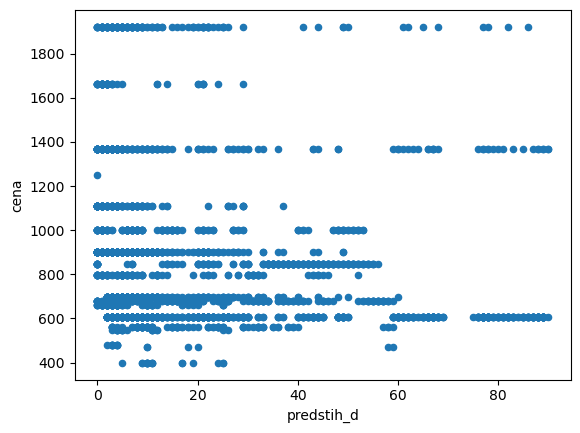

In [679]:
df[df['odkud'].str.contains('Praha') & df['kam'].str.contains('Buda') & (df['prestupy'] == 0)].plot.scatter(x='predstih_d',y='cena')

In [680]:
df[df['odkud'].str.contains('Brn')]['kam'].drop_duplicates()

35             Praha hl.n.
68        Praha-Holešovice
174            Hamburg Hbf
37487            Ljubljana
68231      Hamburg-Harburg
122527               Praha
126502               Vídeň
157164             Ostrava
Name: kam, dtype: category
Categories (71, object): ['Amsterdam Bijlmer ArenA', 'Amsterdam Centraal', 'Amsterdam Zuid', 'Berlin Betriebsbf Schöneweide', ..., 'Ústí n.L.hl.n.', 'Ústí nad Labem hlavní nádraží', 'České Budějovice', 'Čop']

In [681]:
df[df['odkud'].str.contains('Brn') & df['kam'].str.contains('Hamb')]

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium
174,2024-10-31 23:32:19,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 03:10:00,1 days 03:37:41,1,27.628056,2406.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",661.0,NaN,"[0, 0, 0]",None,so,2.0,"[R 876 Svitava, EC 178 Berliner, ICE 602]",None,None,NaN,NaN,NaN,NaN
175,2024-10-31 23:32:19,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 00:29:00,1 days 00:56:41,1,24.944722,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,635.0,NaN,"[0, 0]",Cena v dalším kroku,so,1.0,"[NJ 456 nightjet, ICE 806]",None,None,NaN,NaN,NaN,NaN
176,2024-10-31 23:32:19,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 18:22:00,1 days 18:49:41,1,42.828056,NaN,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",865.0,NaN,"[0, 0, 0, 0]",Zjistit cenu,so,3.0,"[EC 281 Metropolitan, EC 107 Porta Moravica, N...",None,None,NaN,NaN,NaN,NaN
177,2024-10-31 23:32:19,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 17:22:00,1 days 17:49:41,1,41.828056,NaN,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",925.0,NaN,"[0, 0]",None,so,1.0,"[rj 371 Vindobona, NJ 490 nightjet]",None,None,NaN,NaN,NaN,NaN
178,2024-10-31 23:32:19,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 15:39:00,1 days 16:06:41,1,40.111389,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,992.0,NaN,"[0, 0, 0, 0]",Zjistit cenu,so,3.0,"[EC 276 Metropolitan, EC 458 Canopus, ICE 1500...",None,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147127,2024-11-07 18:03:09,ČD,Brno hl.n.,Hamburg Hbf,2025-02-04 14:39:00,88 days 20:35:51,88,2132.597500,1264.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,593.0,NaN,"[0, 0]",None,út,1.0,"[rj 256 Vindobona, ICE 700]",None,None,NaN,NaN,NaN,NaN
147128,2024-11-07 18:03:09,ČD,Brno hl.n.,Hamburg Hbf,2025-02-04 09:22:00,88 days 15:18:51,88,2127.314167,7265.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",632.0,NaN,"[0, 0, 0]",None,út,2.0,"[rj 73 Vindobona, ICE 26, ICE 786]",None,None,NaN,NaN,NaN,NaN
147129,2024-11-07 18:03:09,ČD,Brno hl.n.,Hamburg Hbf,2025-02-04 13:39:00,88 days 19:35:51,88,2131.597500,1264.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,595.0,NaN,"[0, 0, 0]",None,út,2.0,"[EC 278 Metropolitan, EC 170 Berliner, ICE 502]",None,None,NaN,NaN,NaN,NaN
147130,2024-11-07 18:03:09,ČD,Brno hl.n.,Hamburg Hbf,2025-02-04 07:39:00,88 days 13:35:51,88,2125.597500,1264.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",572.0,934.0,"[0, 0]",None,út,1.0,"[EC 282 Metropolitan Slovenská strela, EC 174 ...",True,None,NaN,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

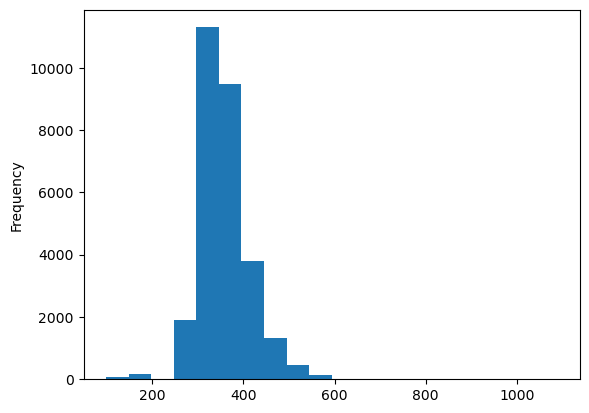

In [682]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Brn')]['cena'].plot.hist(bins=20)

In [683]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Brn')].groupby('predstih_d')['cena'].median()

predstih_d
-1     419.0
 0     359.0
 1     359.0
 2     359.0
 3     359.0
 4     359.0
 5     359.0
 6     359.0
 7     359.0
 8     359.0
 9     329.0
 10    339.0
 11    329.0
 12    329.0
 13    359.0
 14    339.0
 15    339.0
 16    339.0
 17    329.0
 18    329.0
 19    329.0
 20    339.0
 21    329.0
 22    329.0
 23    329.0
 24    329.0
 25    329.0
 26    359.0
 27    339.0
 28    329.0
 29    329.0
 30    344.0
 31    299.0
 32    349.0
 33    339.0
 34    329.0
 35    339.0
 36    359.0
 37    435.0
 38    329.0
 39    359.0
 40    339.0
 41    359.0
 42    359.0
 43    329.0
 44    359.0
 45    329.0
 46    329.0
 47    329.0
 48    359.0
 49    329.0
 50    329.0
 51    415.0
 52    359.0
 53    329.0
 54    329.0
 55    359.0
 57    329.0
 58    329.0
 59    359.0
 60    359.0
 61      NaN
 62      NaN
 63      NaN
 64      NaN
 65      NaN
 66      NaN
 67      NaN
 68      NaN
 70      NaN
 73      NaN
 74      NaN
 75      NaN
 76      NaN
 77      NaN
 78      NaN
 

In [684]:
df[df['odkud'].str.contains('Brno')].groupby(['kam','prodejce'])['cena'].min().nsmallest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\2553821891.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['odkud'].str.contains('Brno')].groupby(['kam','prodejce'])['cena'].min().nsmallest(50)


kam                            prodejce
Praha                          RJ            99.0
Vídeň                          RJ           149.0
Ostrava                        RJ           189.0
Praha hl.n.                    ČD           269.0
Praha-Holešovice               ČD           479.0
Hamburg Hbf                    ČD           645.0
Ljubljana                      ČD          1109.0
Amsterdam Bijlmer ArenA        ARR            NaN
                               LE             NaN
                               RJ             NaN
                               ČD             NaN
Amsterdam Centraal             ARR            NaN
                               LE             NaN
                               RJ             NaN
                               ČD             NaN
Amsterdam Zuid                 ARR            NaN
                               LE             NaN
                               RJ             NaN
                               ČD             NaN
Berlin Bet

In [685]:
df[df['volnych_mist'].notnull()].groupby('prodejce').size()

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\1571294427.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['volnych_mist'].notnull()].groupby('prodejce').size()


prodejce
ARR    13036
LE         0
RJ     16886
ČD         0
dtype: int64

In [686]:
df['predstih_i'] = df['predstih_h'].apply(lambda x: round(x,0))

In [687]:
df[df['odkud'].str.contains('Praha') & (df['kam'].str.contains('Ostrava'))].groupby('predstih_i')['volnych_mist'].mean().head(20)

predstih_i
-1.0            NaN
 0.0            NaN
 1.0     116.000000
 2.0     133.375000
 3.0     128.666667
 4.0     152.333333
 5.0     135.333333
 6.0     159.666667
 7.0     156.000000
 8.0     146.666667
 9.0     160.333333
 10.0    127.600000
 11.0    184.000000
 12.0    153.750000
 13.0    176.500000
 14.0    181.750000
 15.0    137.000000
 16.0    153.666667
 17.0    100.333333
 18.0    103.750000
Name: volnych_mist, dtype: float64

In [688]:
df.groupby('predstih_d')['cena'].median()

predstih_d
-1      765.0
 0      429.0
 1      449.0
 2      449.0
 3      435.0
 4      425.0
 5      504.0
 6      469.0
 7      435.0
 8      490.0
 9      425.0
 10     425.0
 11     400.0
 12     490.0
 13     435.0
 14     439.0
 15     435.0
 16     439.0
 17     387.0
 18     399.0
 19     399.0
 20     439.0
 21     490.0
 22     559.0
 23     513.0
 24     469.0
 25     439.0
 26     532.0
 27     585.0
 28     439.0
 29     490.0
 30     469.0
 31     585.0
 32     429.0
 33     427.0
 34     439.0
 35     568.0
 36     400.0
 37     568.0
 38     490.0
 39     425.0
 40     400.0
 41     545.0
 42     439.0
 43     399.0
 44     549.0
 45     359.0
 46     439.0
 47     400.0
 48     415.0
 49     467.0
 50     599.0
 51     479.0
 52     387.0
 53     439.0
 54     400.0
 55     507.5
 56     439.0
 57     479.0
 58     393.5
 59     469.0
 60     606.0
 61    1264.0
 62     479.0
 63     439.0
 64     299.0
 65     748.0
 66    1264.0
 67    1909.0
 68    2387.0
 69     6

In [689]:
df.sort_values('predstih_d')

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_i
44424,2024-11-03 09:17:02,ČD,Harmica,Zagreb Glavni kolodvor,2024-11-03 08:29:00,-1 days +23:11:58,-1,-0.800556,NaN,vlak,NaN,"[Téměr vyprodaná místa k sezení, Téměr vyproda...",1105.0,NaN,"[0, 0, 0, 0]",Zjistit cenu,ne,3.0,"[rj 371 Vindobona, IC 310 DRAVA, R 2251, RER 8...",None,None,NaN,NaN,NaN,NaN,-1.0
94141,2024-11-05 16:52:54,ČD,Praha hl.n.,Budapest-Kelenföld,2024-11-05 16:44:00,-1 days +23:51:06,-1,-0.148333,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,438.0,NaN,"[0, 0]",None,út,1.0,"[rj 373 Vindobona, rjx 12261]",None,None,NaN,NaN,NaN,NaN,-0.0
85257,2024-11-05 09:27:46,ČD,Pardubice hl.n.,Košice,2024-11-05 09:22:00,-1 days +23:54:14,-1,-0.096111,NaN,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",451.0,601.0,[0],None,út,1.0,"[EC 141 Ostravan, Ex 607 TATRAN]",None,None,NaN,NaN,NaN,NaN,-0.0
119540,2024-11-06 18:34:00,ČD,Praha hl.n.,Amsterdam Centraal,2024-11-06 18:28:00,-1 days +23:54:00,-1,-0.100000,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,930.0,NaN,"[0, 1, 0]",None,st,2.0,"[EC 458 Canopus, ICE 699, IC 60402]",None,None,NaN,NaN,NaN,NaN,-0.0
28487,2024-11-02 12:32:15,ČD,Brno hl.n.,Hamburg Hbf,2024-11-02 12:22:00,-1 days +23:49:45,-1,-0.170833,NaN,vlak,NaN,[Předpokládané vysoké obsazení - doporučujeme ...,716.0,NaN,"[3, 0, 6, 0, 0]",None,so,4.0,"[EC 277 Metropolitan, EC 105 Polonia, rjx 64 r...",None,None,NaN,NaN,NaN,NaN,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137794,2024-11-07 09:12:02,ČD,Olomouc hl.n.,Przemysl Gl.,2025-02-08 07:51:00,92 days 22:38:58,92,2230.649444,NaN,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,419.0,NaN,"[0, 0, 0]",Zjistit cenu,so,2.0,"[EC 121 Valašský expres, EC 108 Sobieski, IC 7...",None,None,NaN,NaN,NaN,NaN,2231.0
46615,2024-11-03 09:54:26,ČD,České Budějovice,Zürich HB,2025-02-04 10:05:00,93 days 00:10:34,93,2232.176111,NaN,vlak,NaN,"[Téměr vyprodaná místa k sezení, Téměr vyproda...",617.0,NaN,"[0, 0, 0, 0, 0]",Zjistit cenu,út,4.0,"[Sp 3803 Vltava Dunaj, rjx 862, R 5728, IR 327...",None,None,NaN,NaN,NaN,NaN,2232.0
46619,2024-11-03 09:54:26,ČD,München Hbf Gl.27-36,Zürich HB,2025-02-04 12:54:00,93 days 02:59:34,93,2234.992778,NaN,vlak,NaN,"[Téměr vyprodaná místa k sezení, Téměr vyproda...",623.0,NaN,"[0, 0, 0, 0, 0]",Zjistit cenu,út,4.0,"[R 658 Bezdrev, IC 566 Západní expres, Sp 5282...",None,None,NaN,NaN,NaN,NaN,2235.0
46605,2024-11-03 09:54:26,ČD,České Budějovice,Zürich HB,2025-02-04 12:05:00,93 days 02:10:34,93,2234.176111,NaN,vlak,NaN,"[Téměr vyprodaná místa k sezení, Téměr vyproda...",555.0,NaN,"[0, 0]",Zjistit cenu,út,1.0,"[EC 333 Jižní expres, rjx 166]",None,None,NaN,NaN,NaN,NaN,2234.0


<Axes: xlabel='predstih_d'>

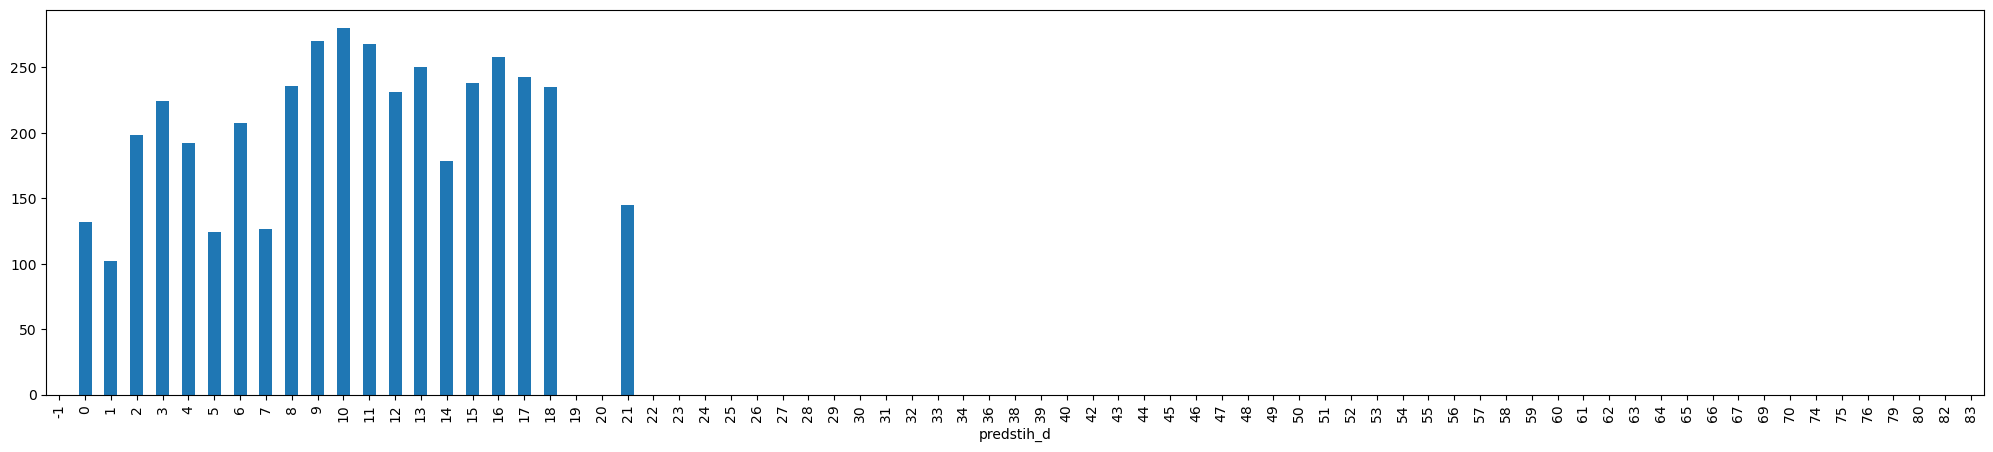

In [690]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Ostrava')].groupby('predstih_d')['volnych_mist'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

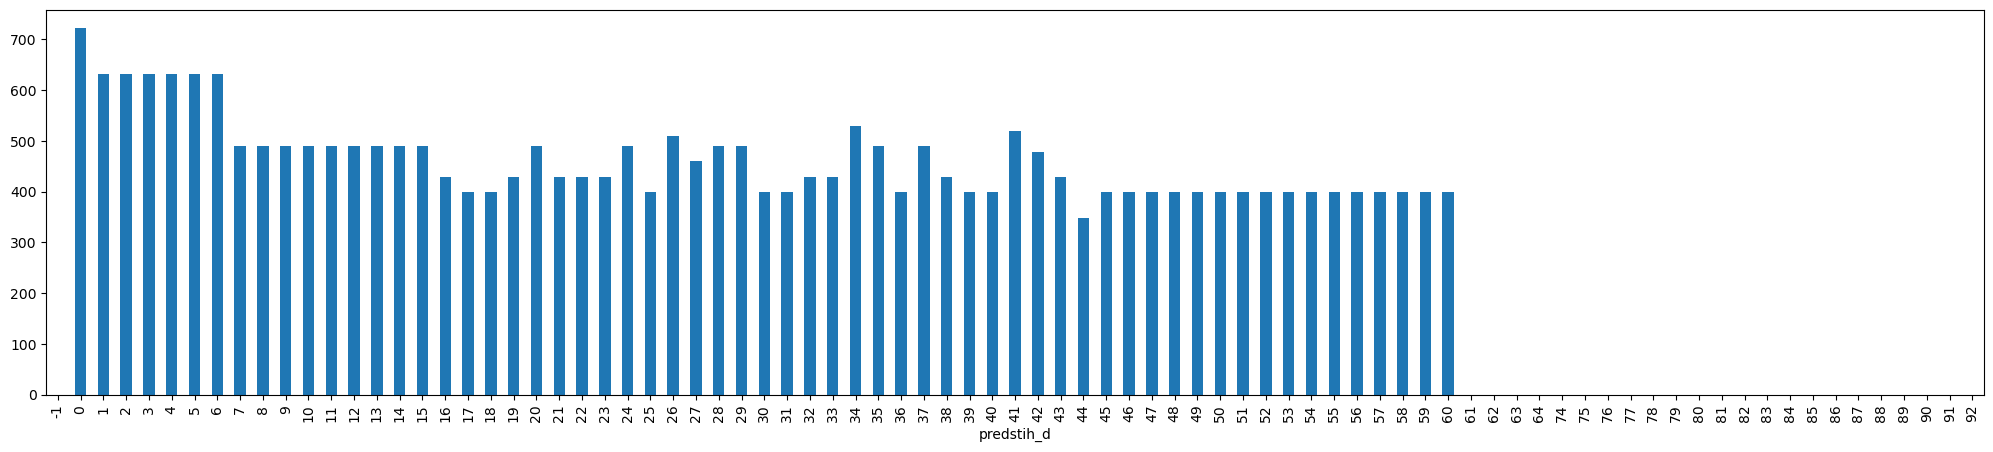

In [691]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Bratisla')].groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

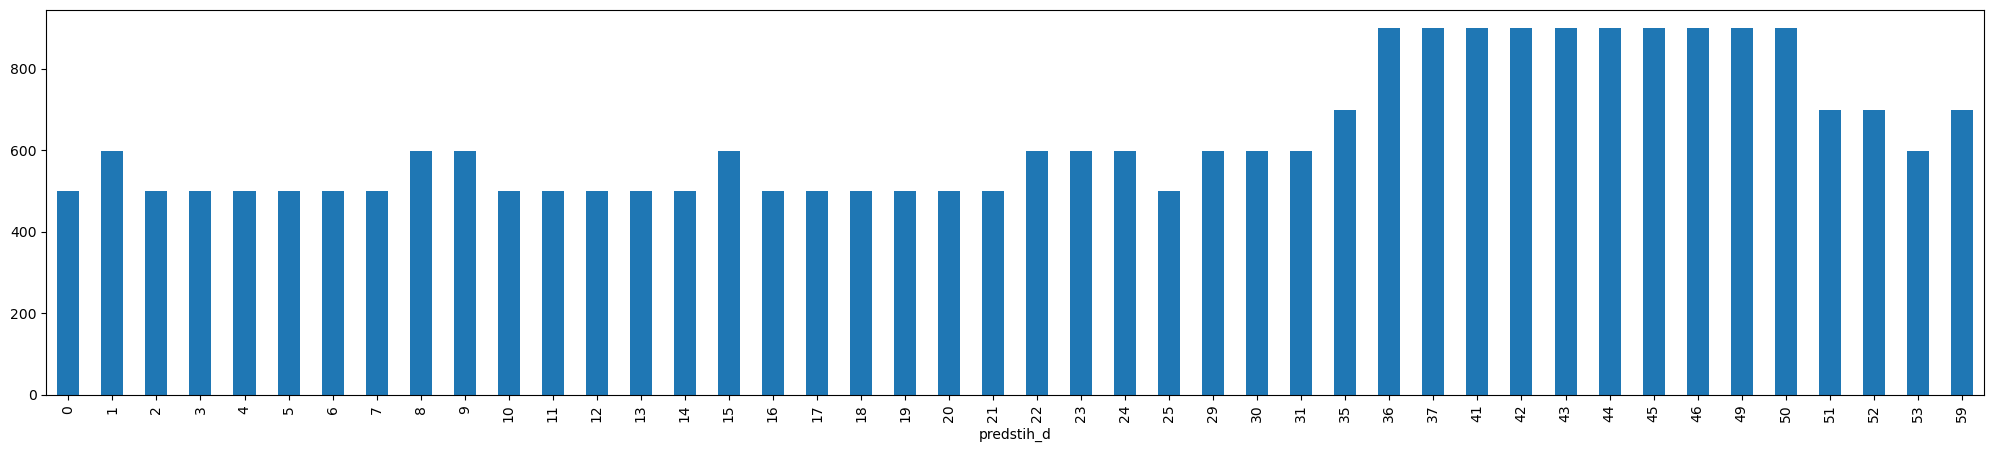

In [692]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Čop')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

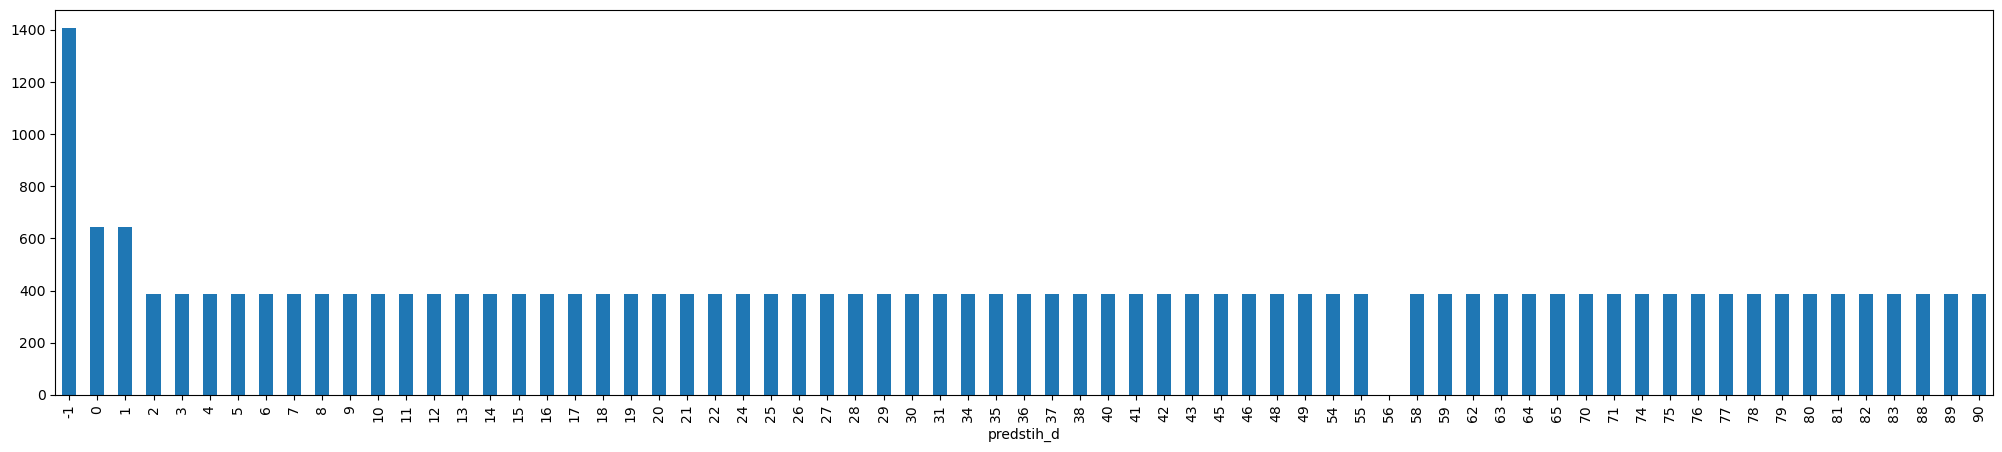

In [693]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Wien')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

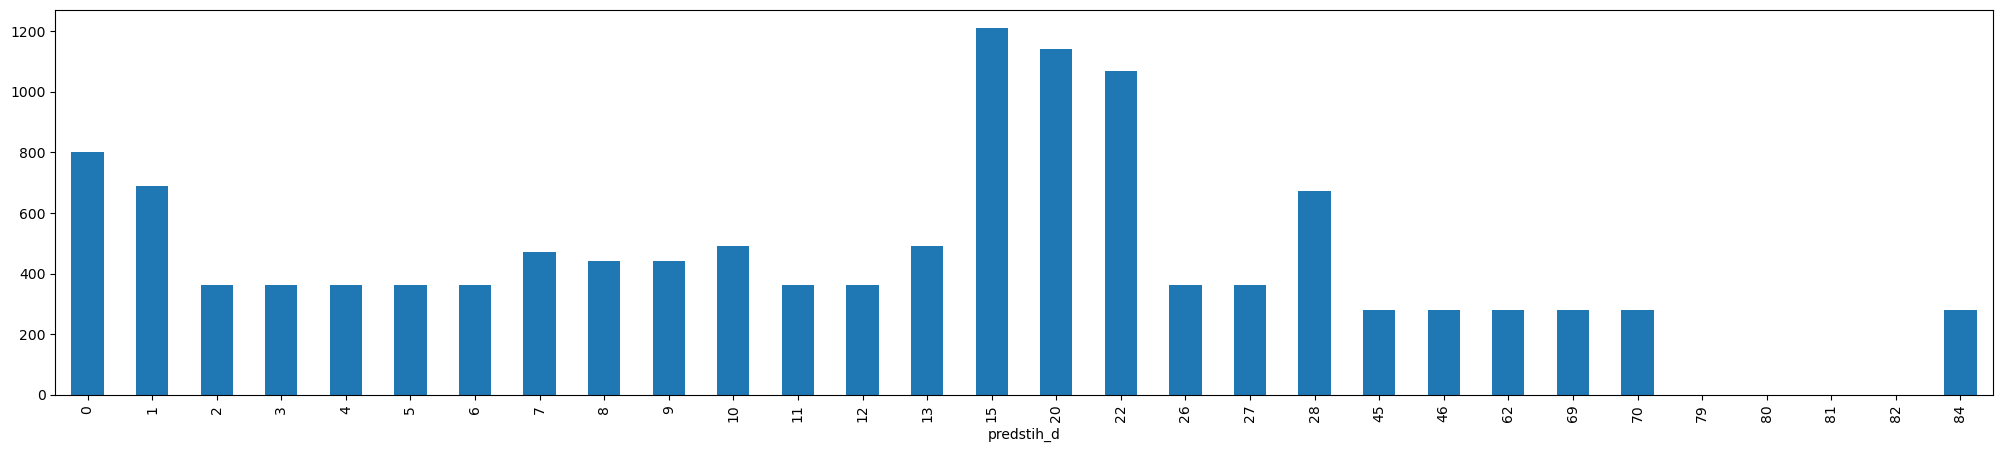

In [694]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Kra')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

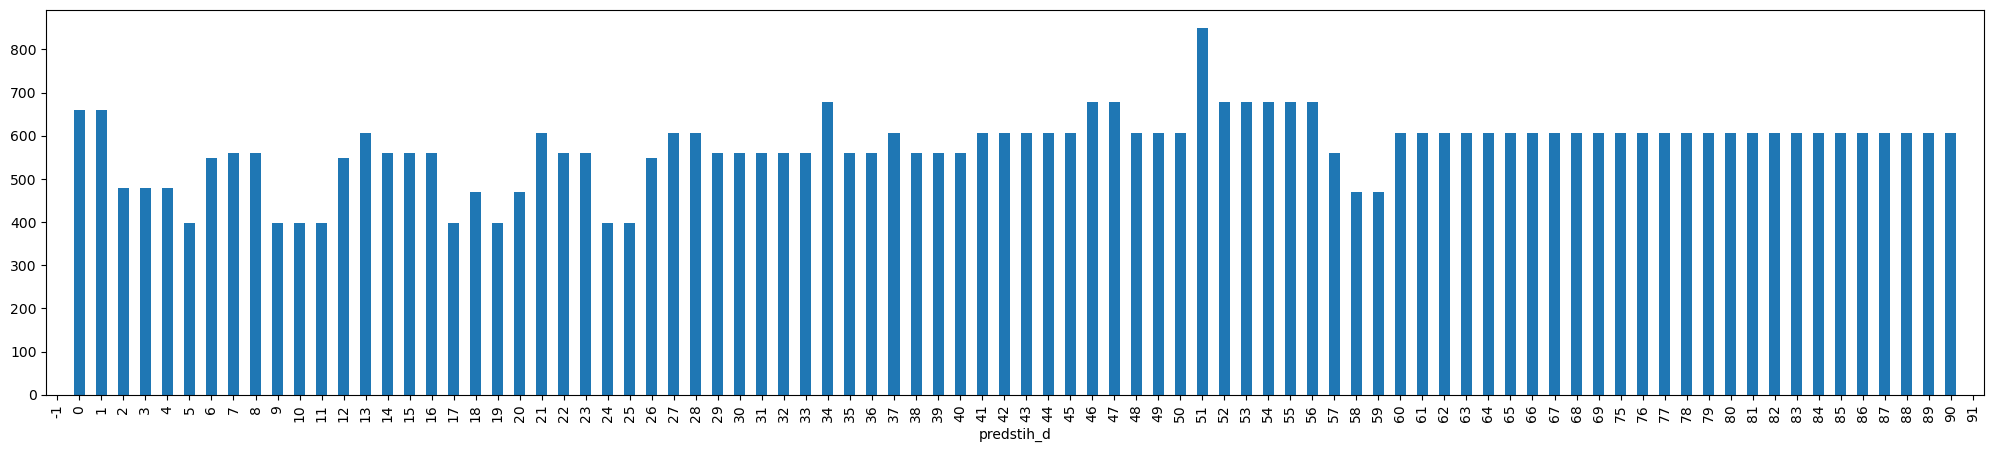

In [695]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Buda')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

In [784]:
df[df['odkud'].str.contains('Brno')].groupby('kam')['cena'].min().nsmallest(10)

C:\Users\micha\AppData\Local\Temp\ipykernel_5176\3516424537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['odkud'].str.contains('Brno')].groupby('kam')['cena'].min().nsmallest(10)


kam
Praha                        99.0
Vídeň                       149.0
Ostrava                     189.0
Praha hl.n.                 269.0
Praha-Holešovice            479.0
Hamburg Hbf                 645.0
Ljubljana                  1109.0
Amsterdam Bijlmer ArenA       NaN
Amsterdam Centraal            NaN
Amsterdam Zuid                NaN
Name: cena, dtype: float64

In [696]:
df[df['odkud'].str.contains('Brn') & df['kam'].str.contains('Prah')].sort_values(by='cena').head(20)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_i
191600,2024-11-08 22:12:44,RJ,Brno,Praha,2024-11-12 05:03:00,3 days 06:50:16,3,78.837778,99.0,vlak,247.0,None,154.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,79.0
165386,2024-11-08 11:17:17,RJ,Brno,Praha,2024-11-10 05:03:00,1 days 17:45:43,1,41.761944,99.0,vlak,299.0,None,154.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,42.0
208307,2024-11-09 06:17:27,RJ,Brno,Praha,2024-11-12 05:03:00,2 days 22:45:33,2,70.759167,99.0,vlak,247.0,None,154.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,71.0
226648,2024-11-09 14:14:37,RJ,Brno,Praha,2024-11-15 05:03:00,5 days 14:48:23,5,134.806389,99.0,vlak,275.0,None,154.0,NaN,None,None,pá,0.0,None,None,None,NaN,NaN,NaN,NaN,135.0
240408,2024-11-09 19:13:35,RJ,Brno,Praha,2024-11-10 05:03:00,0 days 09:49:25,0,9.823611,99.0,vlak,310.0,None,154.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,10.0
226659,2024-11-09 14:14:43,RJ,Brno,Praha,2024-11-16 05:03:00,6 days 14:48:17,6,158.804722,99.0,vlak,277.0,None,154.0,NaN,None,None,so,0.0,None,None,None,NaN,NaN,NaN,NaN,159.0
211890,2024-11-09 08:12:39,RJ,Brno,Praha,2024-11-10 05:03:00,0 days 20:50:21,0,20.839167,99.0,vlak,293.0,None,154.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,21.0
226681,2024-11-09 14:14:48,RJ,Brno,Praha,2024-11-17 05:03:00,7 days 14:48:12,7,182.803333,99.0,vlak,313.0,None,154.0,NaN,None,None,ne,0.0,None,None,None,NaN,NaN,NaN,NaN,183.0
197291,2024-11-08 22:46:57,RJ,Brno,Praha,2024-11-12 05:03:00,3 days 06:16:03,3,78.267500,99.0,vlak,247.0,None,154.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,78.0
159311,2024-11-08 07:53:24,RJ,Brno,Praha,2024-11-12 05:03:00,3 days 21:09:36,3,93.160000,99.0,vlak,259.0,None,154.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,93.0


In [697]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Brn')].sort_values(by='cena').head(20)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_i
187081,2024-11-08 21:48:04,RJ,Praha,Brno,2024-11-14 20:56:00,5 days 23:07:56,5,143.132222,99.0,vlak,283.0,None,157.0,NaN,None,None,čt,0.0,None,None,None,NaN,NaN,NaN,NaN,143.0
124137,2024-11-06 21:41:02,RJ,Praha,Brno,2024-11-07 20:56:00,0 days 23:14:58,0,23.249444,99.0,vlak,283.0,None,157.0,NaN,None,None,čt,0.0,None,None,None,NaN,NaN,NaN,NaN,23.0
240108,2024-11-09 19:12:10,RJ,Praha,Brno,2024-11-13 20:56:00,4 days 01:43:50,4,97.730556,99.0,vlak,298.0,None,157.0,NaN,None,None,st,0.0,None,None,None,NaN,NaN,NaN,NaN,98.0
216430,2024-11-09 10:12:36,RJ,Praha,Brno,2024-11-13 20:56:00,4 days 10:43:24,4,106.723333,99.0,vlak,301.0,None,157.0,NaN,None,None,st,0.0,None,None,None,NaN,NaN,NaN,NaN,107.0
164643,2024-11-08 11:14:25,RJ,Praha,Brno,2024-11-11 20:56:00,3 days 09:41:35,3,81.693056,99.0,vlak,288.0,None,157.0,NaN,None,None,po,0.0,None,None,None,NaN,NaN,NaN,NaN,82.0
211665,2024-11-09 08:11:29,RJ,Praha,Brno,2024-11-11 20:56:00,2 days 12:44:31,2,60.741944,99.0,vlak,284.0,None,157.0,NaN,None,None,po,0.0,None,None,None,NaN,NaN,NaN,NaN,61.0
124238,2024-11-06 21:41:12,RJ,Praha,Brno,2024-11-11 20:56:00,4 days 23:14:48,4,119.246667,99.0,vlak,294.0,None,157.0,NaN,None,None,po,0.0,None,None,None,NaN,NaN,NaN,NaN,119.0
124264,2024-11-06 21:41:16,RJ,Praha,Brno,2024-11-12 20:56:00,5 days 23:14:44,5,143.245556,99.0,vlak,308.0,None,157.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,143.0
211703,2024-11-09 08:11:35,RJ,Praha,Brno,2024-11-12 20:56:00,3 days 12:44:25,3,84.740278,99.0,vlak,305.0,None,157.0,NaN,None,None,út,0.0,None,None,None,NaN,NaN,NaN,NaN,85.0
211710,2024-11-09 08:11:39,RJ,Praha,Brno,2024-11-13 20:56:00,4 days 12:44:21,4,108.739167,99.0,vlak,301.0,None,157.0,NaN,None,None,st,0.0,None,None,None,NaN,NaN,NaN,NaN,109.0


<Axes: xlabel='predstih_d'>

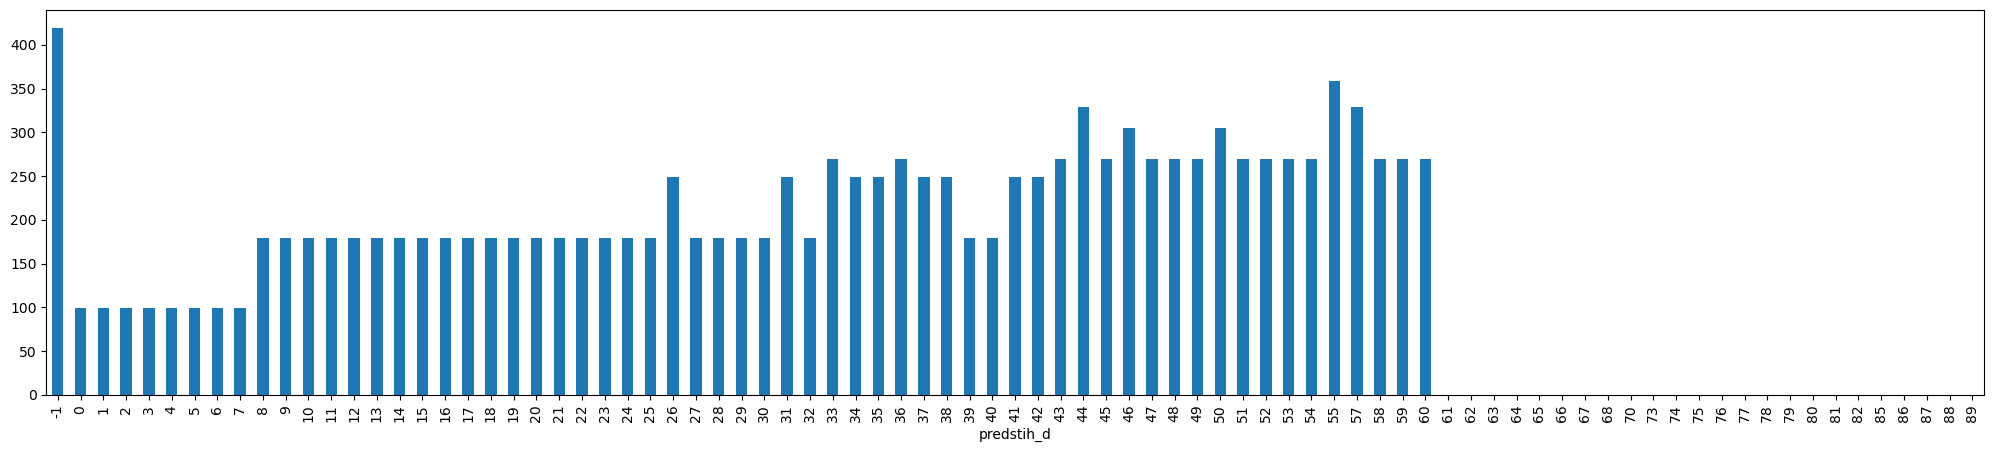

In [698]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Brn')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

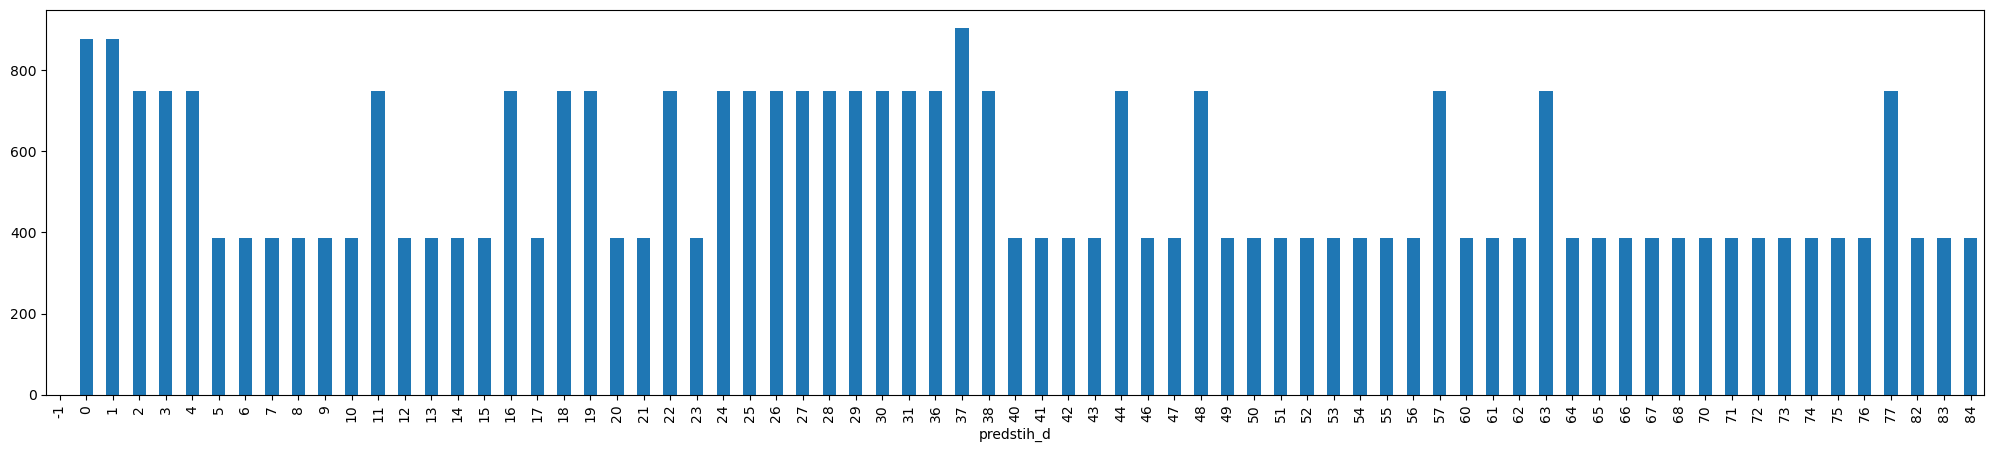

In [699]:
df[df['odkud'].str.contains('Prah') & df['kam'].str.contains('Berl')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

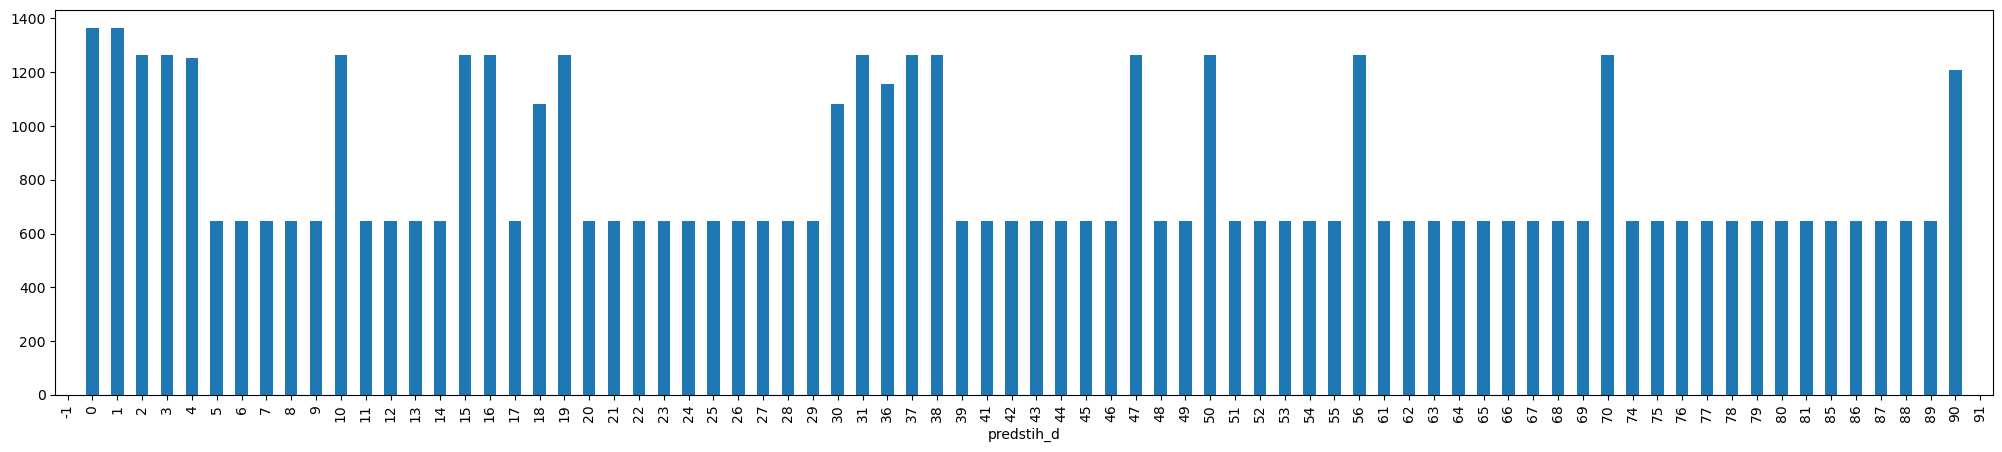

In [700]:
df[df['odkud'].str.contains('Brno') & df['kam'].str.contains('Hamb')].groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

In [701]:
df.dropna(subset=['cena']).sort_values(by='predstih_d',ascending=False).head(20)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,predstih_i
46406,2024-11-03 09:48:36,ČD,Praha hl.n.,Bern,2025-02-01 10:20:00,90 days 00:31:24,90,2160.523333,2387.0,vlak,NaN,"[Téměr vyprodaná místa k sezení, Téměr vyproda...",728.0,NaN,"[0, 0, 0]",None,so,2.0,"[EC 333 Jižní expres, rjx 166, IC 736]",None,None,NaN,NaN,NaN,NaN,2161.0
137776,2024-11-07 09:11:15,ČD,Brno hl.n.,Hamburg Hbf,2025-02-05 18:22:00,90 days 09:10:45,90,2169.179167,1210.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",865.0,NaN,"[0, 0, 0]",None,st,2.0,"[EC 281 Metropolitan, EC 107 Porta Moravica, N...",True,None,NaN,NaN,NaN,NaN,2169.0
137602,2024-11-07 09:07:16,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-02-05 18:42:00,90 days 09:34:44,90,2169.578889,310.0,vlak,NaN,[Předpokládané nízké obsazení],68.0,86.0,[0],None,st,0.0,[rj 256 Vindobona],True,None,NaN,NaN,NaN,NaN,2170.0
137603,2024-11-07 09:07:16,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-02-05 17:45:00,90 days 08:37:44,90,2168.628889,310.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,65.0,86.0,[0],None,st,0.0,[EC 170 Berliner],True,None,NaN,NaN,NaN,NaN,2169.0
137605,2024-11-07 09:07:16,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-02-05 11:45:00,90 days 02:37:44,90,2162.628889,310.0,vlak,NaN,[Předpokládané nízké obsazení],65.0,86.0,[0],None,st,0.0,[EC 174 Berliner],True,None,NaN,NaN,NaN,NaN,2163.0
137624,2024-11-07 09:07:16,ČD,Ústí n.L.hl.n.,Dresden Hbf,2025-02-05 15:45:00,90 days 06:37:44,90,2166.628889,310.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,65.0,86.0,[0],None,st,0.0,[EC 172 Hungaria],True,None,NaN,NaN,NaN,NaN,2167.0
137766,2024-11-07 09:11:15,ČD,Brno hl.n.,Hamburg Hbf,2025-02-05 11:39:00,90 days 02:27:45,90,2162.462500,1264.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,578.0,934.0,[0],None,st,0.0,[EC 172 Hungaria],True,None,NaN,NaN,NaN,NaN,2162.0
137769,2024-11-07 09:11:15,ČD,Brno hl.n.,Hamburg Hbf,2025-02-05 09:22:00,90 days 00:10:45,90,2160.179167,7265.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",632.0,NaN,"[0, 0, 0]",None,st,2.0,"[rj 73 Vindobona, ICE 26, ICE 786]",None,None,NaN,NaN,NaN,NaN,2160.0
137773,2024-11-07 09:11:15,ČD,Brno hl.n.,Hamburg Hbf,2025-02-05 13:39:00,90 days 04:27:45,90,2164.462500,1264.0,vlak,NaN,[Předpokládané střední obsazení - doporučujeme...,572.0,934.0,"[0, 0]",None,st,1.0,"[EC 278 Metropolitan, EC 170 Berliner]",True,None,NaN,NaN,NaN,NaN,2164.0
137775,2024-11-07 09:11:15,ČD,Brno hl.n.,Hamburg Hbf,2025-02-05 17:22:00,90 days 08:10:45,90,2168.179167,8638.0,vlak,NaN,"[Předpokládané nízké obsazení, Předpokládané n...",800.0,NaN,"[0, 0, 0]",None,st,2.0,"[rj 371 Vindobona, IC 494 Wienerwald, ICE 1080]",None,None,NaN,NaN,NaN,NaN,2168.0


In [702]:
df[df['prodejce'] == 'ARR'].groupby('predstih_d').size()

predstih_d
-1        3
 0      923
 1     1034
 2     1052
 3     1061
 4     1028
 5      975
 6      924
 7      854
 8      785
 9      725
 10     664
 11     590
 12     510
 13     429
 14     359
 15     287
 16     185
 17     117
 18      92
 19      82
 20      79
 21      70
 22      62
 23      55
 24      50
 25      48
 26      44
 27      40
 28      40
 29      43
 30      37
 31      27
 32      17
 33      12
 34      12
 35       5
 36       2
dtype: int64